# Run analysis of validation data

In [1]:
%load_ext rpy2.ipython

### Import packages

In [2]:
%%R
library(ggplot2)
library(reshape2)
library(ggfortify)
library(ggplot2)
library(cluster) 
library(factoextra)
library(NbClust)

/Users/dhelekal/anaconda3/envs/py35v3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

  warnings.warn(x, RRuntimeWarning)


### Lets set the experiment WD and simulation WD

In [9]:
%%R
exp_wd <- "./Experiment_out/test1"
sim_wd <- "./Simulation_result/test1/Experiment_test1_1"

### Inspect a Peak

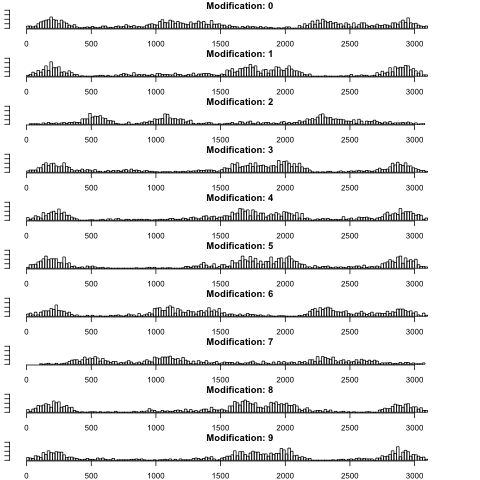

In [10]:
%%R
peak_data<-data.frame(read.csv(paste0(sim_wd,"/","pattern_1/peak_0/data.csv")))
par(mfrow=c(10,1)) 
par(mar=c(2,1,1,1))
for (i in 0:9) {
    hist(subset(peak_data,modification==i)$position, xlim=c(0,3300), ylim = c(0, 40), breaks=200, main=paste0("Modification: ",i ))
}

### Auxilliary Functions

In [11]:
%%R
make_mat <- function(x) {
    b <- matrix(0, 10, 10)
    b[lower.tri(b, diag=FALSE)] <- x
    b <- t(b)
    b <- (b+t(b))
    return(b)
}

get_evecs <- function(x) {
    b <- matrix(0, 10, 10)
    b[lower.tri(b, diag=FALSE)] <- (x/sqrt(sum(x^2)))
    b <- t(b)
    b <- (b+t(b))
    b <- b
    deg <- colSums(b)
    d <- matrix(0, 10, 10)
    diag(d) <- deg
    L <- d-b
    L <- sqrt(diag(1/deg)) %*% L %*% sqrt(diag(1/deg))
    e <- eigen(L)
    vv <- c()
    for (i in 1:9){
        vv <- c(vv,e$vectors[,i]*e$values[i])
    }
    return(e$vectors[,1])
}


### Plot Eigen-Projections

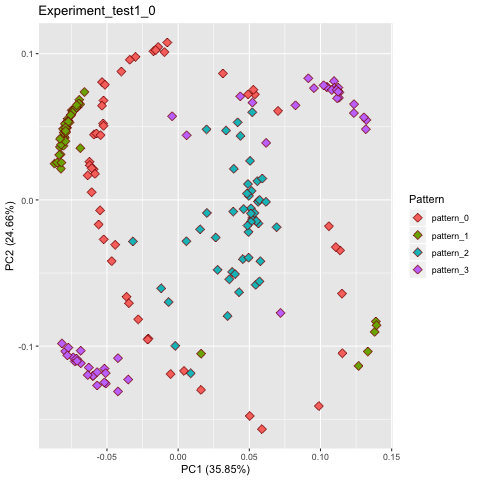

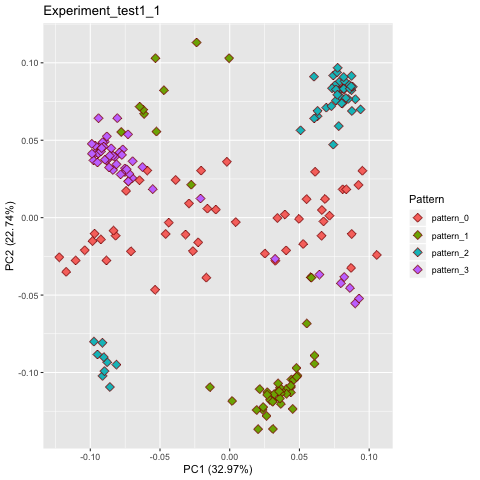

In [12]:
%%R
replicas <- list.dirs(path = exp_wd, full.names = TRUE, recursive = FALSE)

par(mfrow=c(3,2)) 
par(mar=c(1,1,1,1))

for (replica in replicas){
    exp_df <- data.frame()
    patterns <- list.dirs(path = replica, full.names = TRUE, recursive = FALSE)
    for (pattern in patterns){
        pattern_name <- basename(pattern)
        dists <- data.frame(read.csv(file=paste0(pattern, '/', 'MMD_dists.csv'), header=TRUE, sep=","))
        dists$pattern <- pattern_name
        exp_df <- rbind(exp_df, dists)
    }
    evecs <- apply((exp_df[,2:46]),1,get_evecs)
    pca <- prcomp(t(evecs), scale = FALSE)
    patterns <- factor(exp_df$pattern)
    plt <- autoplot(pca) +
        geom_point(shape=23, aes(fill = patterns), color = "darkred", size=3) +
        labs(fill = "Pattern") +
        ggtitle(basename(replica))
    plot(plt)
}

### Plot PCA Projections

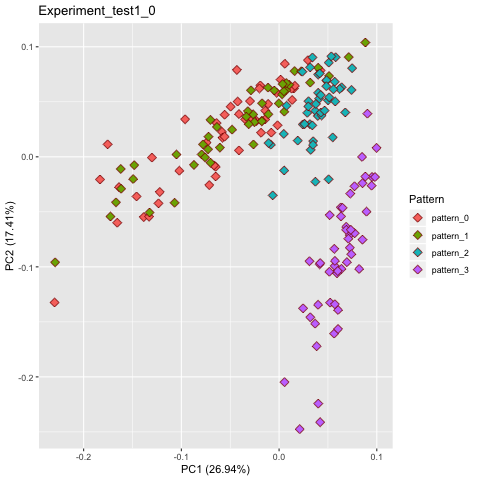

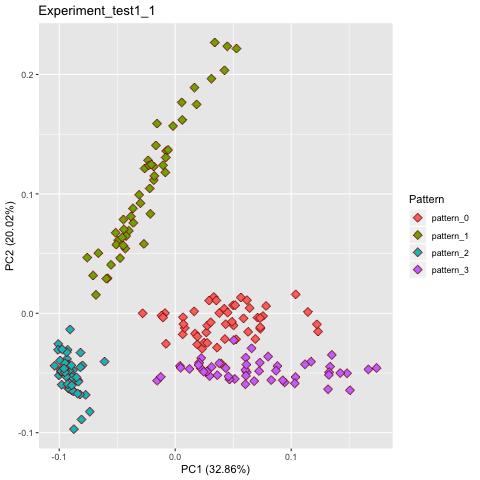

In [13]:
%%R
replicas <- list.dirs(path = exp_wd, full.names = TRUE, recursive = FALSE)

par(mfrow=c(3,2)) 
par(mar=c(1,1,1,1))

for (replica in replicas){
    exp_df <- data.frame()
    patterns <- list.dirs(path = replica, full.names = TRUE, recursive = FALSE)
    for (pattern in patterns){
        pattern_name <- basename(pattern)
        dists <- data.frame(read.csv(file=paste0(pattern, '/', 'MMD_dists.csv'), header=TRUE, sep=","))
        dists$pattern <- pattern_name
        exp_df <- rbind(exp_df, dists)
    }
    pca <- prcomp(exp_df[,2:46], scale = FALSE)
    patterns <- factor(exp_df$pattern)
    plt <- autoplot(pca) +
        geom_point(shape=23, aes(fill = patterns), color="darkred", size=3) +
        labs(fill = "Pattern") +
        ggtitle(basename(replica))
    plot(plt)
}